# DS105-01-18 - Anime Hands-On

## Acitivy Instructions
> Using the `anime dataset`, perform the appropriate analyses and answer the following questions in your Python file.
> 1. Is a Rating Score of 6.2 Different from the Mean in this Dataset?
> 2. Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?
> 3. Does the Source of the Anime Influence the Type of Anime?
> 4. How do the Variables about Popularity / Ranking Relate to Each Other?

### Import Packages

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
anime = pd.read_csv('./assets/anime.csv')

In [3]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


---
## 1. Is a Rating Score of 6.2 Different from the Mean in this Dataset?
Use the variable `score`.

### Test Assumptions

<AxesSubplot:>

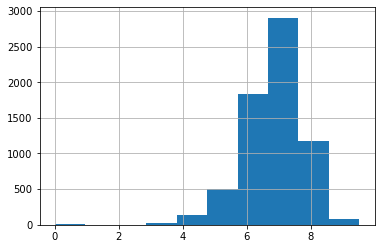

In [4]:
anime['score'].hist()

### Run Analysis

In [5]:
stats.ttest_1samp(anime['score'], 6.2)

Ttest_1sampResult(statistic=57.14153988539698, pvalue=0.0)

- `p` value is the one associated with `t-test`
- `p` value is *is significant* at <b>`p < .05`</b>

    <mark>A 6.2 Rating Score *is significantly* different from the population mean.</mark>

#### Comparing 6.2 rating score to population mean:

In [6]:
anime.score.mean()

6.848998200359939

<b>Rating score mean `6.848.. > 6.2` rating score</b>.

<div class="alert alert-block alert-success">
    
## 1. Conclusion:
A Rating Score of 6.2 is <i>significantly lower</i> than the mean of this dataset. 
    </div>

---
## 2. Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?
Use the variables `status` and `popularity`.

In [7]:
anime.status.unique()

array(['Finished Airing', 'Currently Airing'], dtype=object)

### Test Assumptions

<b>`status == 'Finished Airing'` for shows no longer on the air.</b>

<AxesSubplot:>

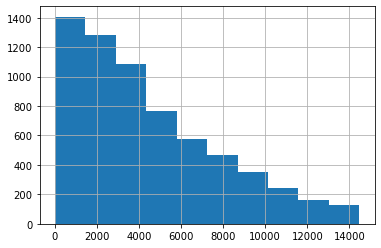

In [8]:
anime.popularity[anime.status == 'Finished Airing'].hist()

<b>`status == 'Currently Airing'` for shows still airing.</b>

<AxesSubplot:>

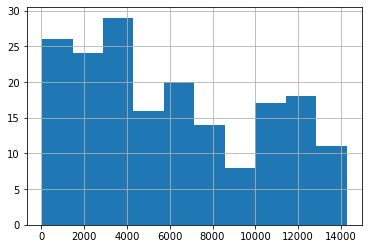

In [9]:
anime.popularity[anime.status == 'Currently Airing'].hist()

### Run Analysis

Use the function `ttest_ind()` to run an independent t test in Python.

In [10]:
ttest_ind(anime.popularity[anime.status == 'Finished Airing'], anime.popularity[anime.status == 'Currently Airing'])

Ttest_indResult(statistic=-6.489071311277514, pvalue=9.256789141747445e-11)

- `p` value is the one associated with `t-test`
- `p` value (note: is in scientific notation) is *is significant* at <b>`p < .05`</b>

There is a <i>significant difference</i> between anime that is still airing vs. those that are no longer airing.

#### Comparing means to find where the significant differences are:

In [11]:
anime.popularity[anime.status == 'Finished Airing'].mean()

4433.558057054742

In [12]:
anime.popularity[anime.status == 'Currently Airing'].mean()

6108.131147540984


<b>No longer airing mean `4433.558.. < 6108.1311..` Still airing mean</b>
    
<div class="alert alert-block alert-success">
    
## 2. Conclusion:
Anime that is still airing is <i>significantly more popular</i> than anime that is no longer airing.
</div>

---
## 3. Does the Source of the Anime Influence the Type of Anime?
Use the variable `source`, recoded to have four levels:
- Manga
- Book
- Game
- Listening<br>

And use the variable `type`.

In [13]:
anime.source.unique()

array(['Manga', 'Original', 'Light novel', '4-koma manga', 'Novel',
       'Visual novel', 'Other', 'Game', 'Picture book', 'Card game',
       'Web manga', 'Book', 'Music', 'Radio', 'Digital manga'],
      dtype=object)

In [14]:
recode = {'Manga':'Manga',
                'Original':'Manga',
                'Light novel':'Book',
                '4-koma manga':'Manga',
                'Novel':'Book',
                'Visual novel':'Game',
                'Other':'Other',
                'Game':'Game',
                'Picture book':'Book',
                'Card game':'Game',
                'Web manga':'Manga',
                'Book':'Book',
                'Music':'Listening',
                'Radio':'Listening',
                'Digital manga':'Manga'}

In [15]:
anime.assign(TEST = anime.source.map(recode))

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,TEST
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012,Manga
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007,Manga
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008,Manga
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002,Manga
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012,Manga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,37405,Dokidoki Little Ooyasan,NaN,dokidokiりとる大家さん,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,Currently Airing,...,[],NaN,NaN,Collaboration Works,Hentai,[],[],30.0,2018,Other
6664,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,我是江小白 小剧场,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,1,Finished Airing,...,"{'Prequel': [{'mal_id': 36775, 'type': 'anime'...",NaN,NaN,2:10 Animation,"Slice of Life, Drama, Romance",[],[],0.0,2018,Manga
6665,37255,Genki Genki Non-tan: Obake Mura Meiro,NaN,げんきげんきノンタン おばけむらめいろ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,Finished Airing,...,"{'Prequel': [{'mal_id': 25619, 'type': 'anime'...",NaN,NaN,Polygon Pictures,"Music, Kids",[],[],35.0,2015,Manga
6666,35229,Mr. Men Little Miss,Mr. Men Little Miss,Mr. Men Little Miss / ミスターメン リトルミス,NaN,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Picture book,0,Currently Airing,...,[],NaN,NaN,Sanrio,Kids,[],[],2.0,2013,Book


In [16]:
anime1 = anime.assign(source = anime.source.map(recode))

In [17]:
anime1.source.unique()

array(['Manga', 'Book', 'Game', 'Other', 'Listening'], dtype=object)

In [18]:
# Drop `source` value of 'Other'
anime2 = anime1[anime1.source != 'Other']

In [19]:
anime2.source.unique()

array(['Manga', 'Book', 'Game', 'Listening'], dtype=object)

### Test Assumptions
> 1. Create a contingency table
> 2. Test for the assumption of 5 per cell in the expected contingency table
> 3. Compute an independent Chi-Square

#### Create a Contingency Table (aka `crosstab`)

Create a contingency table, sometimes called a crosstab, which shows how each level of each variable crosses with the other variable levels.<br>Use `pandas` function `crosstab()`:

In [20]:
anime2_crosstab = pd.crosstab(anime2['source'], anime2['type'])

In [21]:
anime2_crosstab

type,Movie,Music,ONA,OVA,Special,TV
source,,,,,,
Book,149,2,50,120,131,440
Game,97,9,51,326,115,354
Listening,2,42,0,1,1,14
Manga,633,44,285,875,659,2098


### Running the Independent Chi-Square

Once you have the contingency table, then you can run the function `stats.chi2_contingency` on the contingency table you have created:

In [22]:
stats.chi2_contingency(anime2_crosstab)

(2089.251727608622,
 0.0,
 15,
 array([[1.20937519e+02, 1.33154817e+01, 5.29873807e+01, 1.81474915e+02,
         1.24369344e+02, 3.98915359e+02],
        [1.29072330e+02, 1.42111419e+01, 5.65515543e+01, 1.93681748e+02,
         1.32734995e+02, 4.25748230e+02],
        [8.13481071e+00, 8.95660203e-01, 3.56417359e+00, 1.22068329e+01,
         8.36565097e+00, 2.68328717e+01],
        [6.22855340e+02, 6.85777162e+01, 2.72896891e+02, 9.34636504e+02,
         6.40530009e+02, 2.05450354e+03]]))

- <b>First value</b> is the Chi-Square statistic.
- <b>Second value</b> is the `p` value is the one associated with the Chi-Square statistic.
- `p` value *is significant* at <b>`p < .05.`</b>

<b>There is a <i>significant relationship</i> between anime source and type.</b>

### Test the Assumption of 5 Cases per Expected Cell

- <b>`array`</b> is the expected count contingency table if there was <i>no relationship</i> between the two variables.

<b>Assumption <i>has NOT been met</i> with expected counts per cell > 5.</b>

<div class="alert alert-block alert-success">
    
## 3. Conclusion:
There is a <i>significant relationship</i> between anime source and type. <b>However, the assumption has NOT been met, so these results should be considered with consideration.</b> 
</div>

---
## 4. How do the Variables about Popularity / Ranking Relate to Each Other?
Use the following variables:
- `score`
- `scored_by`
- `rank`
- `popularity`
- `members`
- `favorites`

In [23]:
anime_correlation = anime[['score', 'scored_by', 'rank', 'popularity', 'members', 'favorites']]

#### Confirm resulting dataframe:

In [24]:
anime_correlation

,score,scored_by,rank,popularity,members,favorites
0,7.63,139250,1274.0,231,283882,2809
1,7.89,91206,727.0,366,204003,2579
2,7.55,37129,1508.0,1173,70127,802
3,8.21,36501,307.0,916,93312,3344
4,8.67,107767,50.0,426,182765,2082
...,...,...,...,...,...,...
6663,9.52,33,NaN,10273,357,21
6664,0.00,0,12719.0,10168,384,1
6665,4.20,5,10253.0,14257,37,0
6666,4.57,7,11396.0,14066,49,1


### Using .corr() on An Entire Dataset

Call the `.corr()` function, and specify `method='kendall'` for ranked data: 

In [25]:
anime_correlation.corr(method='kendall')

,score,scored_by,rank,popularity,members,favorites
score,1.000000,0.498718,-0.958416,-0.507061,0.506881,0.551956
scored_by,0.498718,1.000000,-0.532556,-0.909989,0.909734,0.745917
rank,-0.958416,-0.532556,1.000000,0.535174,-0.535214,-0.579001
popularity,-0.507061,-0.909989,0.535174,1.000000,-0.999499,-0.776561
members,0.506881,0.909734,-0.535214,-0.999499,1.000000,0.776534
favorites,0.551956,0.745917,-0.579001,-0.776561,0.776534,1.000000


<mark>Remember that you read only the top right or bottom left of this matrix; everything repeats after the diagonal row of ones.</mark>

In [26]:
anime_correlation.corr(method='kendall').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,score,scored_by,rank,popularity,members,favorites
score,1.0,0.5,-0.96,-0.51,0.51,0.55
scored_by,0.5,1.0,-0.53,-0.91,0.91,0.75
rank,-0.96,-0.53,1.0,0.54,-0.54,-0.58
popularity,-0.51,-0.91,0.54,1.0,-1.0,-0.78
members,0.51,0.91,-0.54,-1.0,1.0,0.78
favorites,0.55,0.75,-0.58,-0.78,0.78,1.0


# `###`